The table below give the results of a random sample of size 100 from the 2005–2006 National Health and Nutrition Examination Survey (NHANES) (http://www.randomservices.org/random/data/NHANES.html). The variables are Gender (male or female), Age (in years), Weight (in lbs), Height, Leg length, Waist circumference, & Thigh circumference (all in inches). The data is stored in the  le NHANES.csv.
With this data, we can apply linear regression with multiple independent (or exogenous) variables; this is sometimes called multiple linear regression.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 24
plt.rcParams["figure.figsize"] = (20.0, 10.0)

In [58]:
data = pd.read_csv('NHANES.csv')
data.head()

,Gender,Age,Weight,Height,Leg,Waist,Thigh
0,F,52,231,"63,3","14,2","43,6","25,8"
1,M,75,198,67,"15,6","41,8","20,1"
2,F,29,"155,9","63,9","15,7",36,"19,2"
3,M,18,"177,7","71,2","18,1","33,3","22,4"
4,M,51,"225,3","69,3","15,6",40,23


Use Pandas/Numpy techniques for filtering to separate genders:

In [59]:

print(data.shape)
print(data.isnull().sum())
data = data.dropna()
print(data.isnull().sum())

women = (data.Gender == 'F') # Define boolean series to select each gender from data
men = ~women#(data.Gender == 'M')
women = data.loc[women]
men = data.loc[men]
women.head()

(100, 7)
Gender    0
Age       0
Weight    1
Height    0
Leg       5
Waist     6
Thigh     6
dtype: int64
Gender    0
Age       0
Weight    0
Height    0
Leg       0
Waist     0
Thigh     0
dtype: int64


,Gender,Age,Weight,Height,Leg,Waist,Thigh
0,F,52,231,"63,3","14,2","43,6","25,8"
2,F,29,"155,9","63,9","15,7",36,"19,2"
5,F,21,"173,1","59,1","13,7","38,2","23,5"
6,F,45,149,"65,2","15,4","34,8","18,3"
7,F,72,"189,4","62,6","11,8","44,3","20,7"


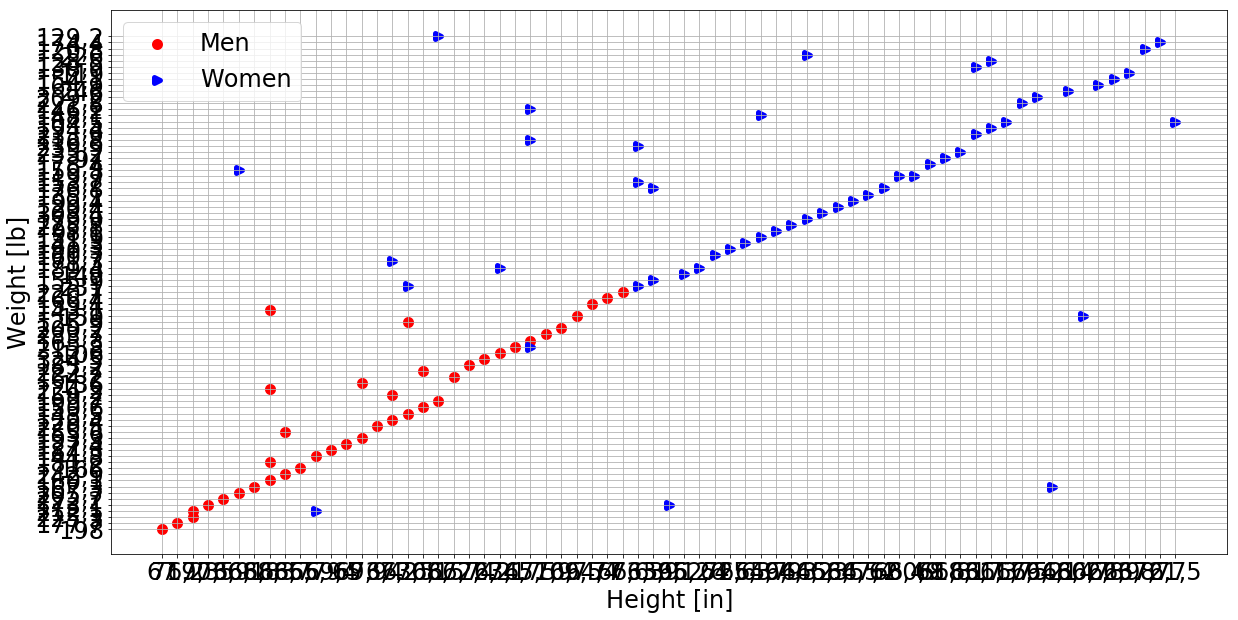

In [60]:
# Examine a 2D cross-section of the data stratified by gender
plt.scatter(men.Height, men.Weight, color='r', marker='o', linewidth=5, label='Men')
plt.scatter(women.Height, women.Weight, color='b', marker='>', linewidth=5, label='Women')
plt.grid(True) 
plt.legend(loc='upper left') 
plt.xlabel('Height [in]') 
plt.ylabel('Weight [lb]') 
plt.show()

Let's think of Weights as a dependent variable and construct a linear regression model using the other variables 
(except Gender; we've separated out the two categories of subjects) as independent variables. To do this,
we'll subselect a sequence of columns from the DataFrame and use those to construct a regression.

In [65]:
n_men = len(men)
print(n_men)
cols = men.columns.symmetric_difference(['Gender', 'Weight'])
#print(men)

men.loc[:,cols].head()

40


,Age,Height,Leg,Thigh,Waist
1,75,67,"15,6","20,1","41,8"
3,18,"71,2","18,1","22,4","33,3"
4,51,"69,3","15,6",23,40
11,35,"69,3","18,1","24,2","41,6"
13,71,"70,5","15,7","17,8","36,7"


In [66]:
# Extract target y and matrix X

y_men = men['Weight'].values.reshape((n_men,1))
X_men = np.concatenate((np.ones((n_men,1),dtype=np.float64), men.loc[:,cols].values), axis=1)
print(X_men)

[[1.0 75 '67' '15,6' '20,1' '41,8']
 [1.0 18 '71,2' '18,1' '22,4' '33,3']
 [1.0 51 '69,3' '15,6' '23' '40']
 [1.0 35 '69,3' '18,1' '24,2' '41,6']
 [1.0 71 '70,5' '15,7' '17,8' '36,7']
 [1.0 32 '73,9' '17,1' '23,6' '39,9']
 [1.0 71 '66,1' '15,3' '21,1' '47,4']
 [1.0 29 '68,8' '16,6' '21,9' '34,9']
 [1.0 50 '68,3' '17,6' '19,1' '36']
 [1.0 52 '68,7' '15,9' '22,9' '48,5']
 [1.0 54 '65,7' '15' '19,5' '37,4']
 [1.0 32 '68,3' '16,4' '21,2' '36,2']
 [1.0 63 '65,9' '15,8' '18,3' '36,7']
 [1.0 30 '69,4' '16' '20,9' '37,3']
 [1.0 73 '65' '17,2' '16,7' '33,2']
 [1.0 80 '69,9' '18,6' '20,6' '40,4']
 [1.0 22 '68,7' '17' '19,8' '30,5']
 [1.0 19 '73,4' '18,3' '25,1' '39,1']
 [1.0 59 '67,2' '16,4' '17,5' '31,9']
 [1.0 27 '63,5' '15,6' '20,3' '32,3']
 [1.0 32 '70,1' '17,9' '20,3' '32']
 [1.0 21 '68,5' '17,8' '23,5' '40,3']
 [1.0 30 '67,2' '15,7' '20,8' '33,5']
 [1.0 35 '68,3' '15,9' '23,1' '44,7']
 [1.0 19 '69,9' '17,7' '18,4' '31,3']
 [1.0 38 '66,7' '16,8' '20' '33,9']
 [1.0 68 '70,1' '16,6' '21,1' '4

Ready to solve the measure to learn of the algorithm: w_LS = (X.T.X)-1(X.T.y)

In [68]:
#Determine the regression weights

#w_mean_LS = np.linalg.inv(X_men.T.dot(X_men), X_men.dot(y_men))
w_men_LS = np.linalg.solve(np.dot(X_men.T,X_men), np.dot(X_men.T, y_men))#, np.dot(X_men_transpose, y_men))
print(w_men_LS)

TypeError: can't multiply sequence by non-int of type 'str'